# Multivariate Time Series Weather Forecasting  

### Import Dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

### Data Collection and Processing

In [2]:
# load dataset
climate_data = pd.read_csv("data/jena_climate_2009_2016.csv")

In [3]:
# show dataset
climate_data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
# dataset dimension
climate_data.shape

(420551, 15)

In [5]:
# Takuing each hour data only 
climate_data = climate_data[5::6]
climate_data

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [6]:
# change the index columns to plot with datetime
climate_data.index = pd.to_datetime(climate_data['Date Time'], format='%d.%m.%Y %H:%M:%S')
# display data for 24hrs
climate_data[:24]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 01:00:00,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
2009-01-01 07:00:00,01.01.2009 07:00:00,998.33,-9.17,264.12,-10.10,92.9,3.04,2.83,0.22,1.76,2.83,1315.98,2.08,2.88,348.8
2009-01-01 08:00:00,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
2009-01-01 09:00:00,01.01.2009 09:00:00,999.69,-7.66,265.52,-8.84,91.2,3.43,3.13,0.30,1.95,3.13,1310.14,0.34,0.63,202.2


### Data Visualization

In [7]:
# feature visualization function
def plot_feature(feature, feature_name):
    plt.plot(feature)
    plt.xlabel("Years")
    plt.ylabel(feature_name)
    plt.title(f"Time Series {feature_name} Plot")

In [8]:
# features
temperature = climate_data['T (degC)']
pressure = climate_data["p (mbar)"]

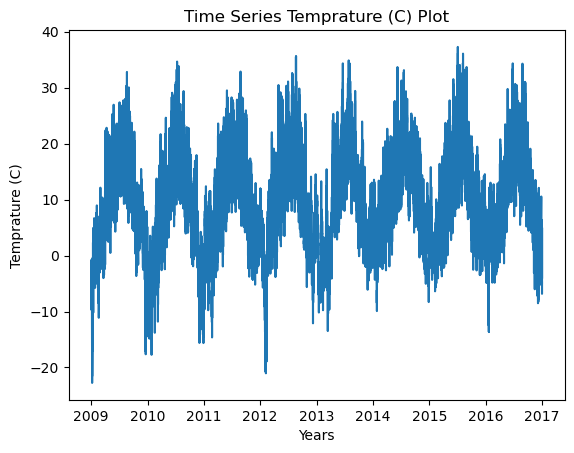

In [9]:
plot_feature(temperature, "Temprature (C)")

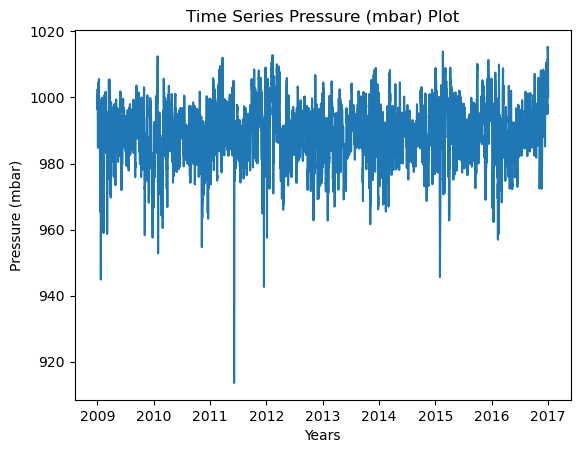

In [10]:
plot_feature(pressure, "Pressure (mbar)")

### Make new dataframe with multiple features

In [11]:
# create new dataframe with the feature columns
temp_pre_time_df = pd.DataFrame({"Pressure": pressure,
                            "Temperature": temperature,
                            "Seconds": climate_data.index.map(pd.Timestamp.timestamp)
                           })
temp_pre_time_df

,Pressure,Temperature,Seconds
Date Time,,,
2009-01-01 01:00:00,996.50,-8.05,1.230772e+09
2009-01-01 02:00:00,996.62,-8.88,1.230775e+09
2009-01-01 03:00:00,996.84,-8.81,1.230779e+09
2009-01-01 04:00:00,996.99,-9.05,1.230782e+09
2009-01-01 05:00:00,997.46,-9.63,1.230786e+09
...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,1.483211e+09
2016-12-31 20:10:00,1001.40,-1.40,1.483215e+09
2016-12-31 21:10:00,1001.19,-2.75,1.483219e+09


In [12]:
# seconds in a year
day = 60*60*24
year = 365.2425*day

# time into sin and cos signals
temp_pre_time_df['Day sin']  = np.sin(temp_pre_time_df['Seconds'] * (2 * np.pi / day))
temp_pre_time_df['Day cos']  = np.cos(temp_pre_time_df['Seconds'] * (2 * np.pi / day))
temp_pre_time_df['Year sin']  = np.sin(temp_pre_time_df['Seconds'] * (2 * np.pi / year))
temp_pre_time_df['Year cos']  = np.cos(temp_pre_time_df['Seconds'] * (2 * np.pi / year))
temp_pre_time_df.head()

,Pressure,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,1.230772e+09,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,1.230775e+09,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,1.230779e+09,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,1.230782e+09,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,1.230786e+09,0.965926,0.258819,0.012916,0.999917


In [13]:
# remove seconds column
temp_pre_time_df = temp_pre_time_df.drop('Seconds', axis=1)
temp_pre_time_df.head()

,Pressure,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,0.258819,0.965926,0.010049,0.999950
2009-01-01 02:00:00,996.62,-8.88,0.500000,0.866025,0.010766,0.999942
2009-01-01 03:00:00,996.84,-8.81,0.707107,0.707107,0.011483,0.999934
2009-01-01 04:00:00,996.99,-9.05,0.866025,0.500000,0.012199,0.999926
2009-01-01 05:00:00,997.46,-9.63,0.965926,0.258819,0.012916,0.999917


### Selecting Features and targets

In [14]:
# preparing features(each row in dataframe) and target(pressure and temperature) 
def df_to_X_Y(df, window_size = 7):
    df_as_np = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][:2]
        Y.append(label)
    return np.array(X), np.array(Y)

In [15]:
# features(70084 data each window contains 7rows, 6 columns) and target(70084 data each 2 columns) dimensions
X, Y = df_to_X_Y(temp_pre_time_df)
X.shape, Y.shape

((70084, 7, 6), (70084, 2))

### Split Train Test data

In [16]:
# train test
X_train, Y_train = X[:60000], Y[:60000]
X_val, Y_val = X[60000:65000], Y[60000:65000]
X_test, Y_test = X[65000:], Y[65000:]
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((60000, 7, 6), (60000, 2), (5000, 7, 6), (5000, 2), (5084, 7, 6), (5084, 2))

### Data Standardization

In [17]:
# calculate mean, std and standardise data
p_training_mean = np.mean(X_train[:, :, 0])
p_training_std = np.std(X_train[:, :, 0])

temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])

def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - p_training_mean) / p_training_std
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean) / temp_training_std
    return X
    
def preprocess_output(Y):
    Y[:, 0] = (Y[:, 0] - p_training_mean) / p_training_std
    Y[:, 1] = (Y[:, 1] - temp_training_mean) / temp_training_std
    return Y

In [18]:
# preprocess inputs
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

# preprocess outputs
preprocess_output(Y_train)
preprocess_output(Y_val)
preprocess_output(Y_test)

array([[  -0.7934386 , -118.35804908],
       [  -0.76312281, -118.41868065],
       [  -0.72189335, -118.45020907],
       ...,
       [   1.48145784, -120.25945506],
       [   1.41597574, -120.2764319 ],
       [   1.35049365, -120.40254556]])

### Model Building

### LSTM Neural Network

In [36]:
## LSTM Model
model_lstm = Sequential()
model_lstm.add(InputLayer((7, 6)))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(8, 'relu'))
model_lstm.add(Dense(2, 'linear'))
model_lstm.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                18176     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
#save best model
cp_lstm = ModelCheckpoint('model_lstm/', save_best_only = True)

#complile model
model_lstm.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [38]:
# model training
model_lstm.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 10, callbacks = [cp_lstm])

Epoch 1/10
1852/1875 [============================>.] - ETA: 0s - loss: 5287.8779 - root_mean_squared_error: 72.7178INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 10s 4ms/step - loss: 5267.0962 - root_mean_squared_error: 72.5748 - val_loss: 3608.6985 - val_root_mean_squared_error: 60.0724
Epoch 2/10
1859/1875 [============================>.] - ETA: 0s - loss: 2223.9333 - root_mean_squared_error: 47.1586INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 2213.9016 - root_mean_squared_error: 47.0521 - val_loss: 1057.6816 - val_root_mean_squared_error: 32.5220
Epoch 3/10
1850/1875 [============================>.] - ETA: 0s - loss: 428.8394 - root_mean_squared_error: 20.7084INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 424.0567 - root_mean_squared_error: 20.5926 - val_loss: 72.0313 - val_root_mean_squared_error: 8.4871
Epoch 4/10
1860/1875 [============================>.] - ETA: 0s - loss: 13.3684 - root_mean_squared_error: 3.6563INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 13.2705 - root_mean_squared_error: 3.6429 - val_loss: 1.1271 - val_root_mean_squared_error: 1.0617
Epoch 5/10
1862/1875 [============================>.] - ETA: 0s - loss: 1.0236 - root_mean_squared_error: 1.0117INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 1.0237 - root_mean_squared_error: 1.0118 - val_loss: 1.0001 - val_root_mean_squared_error: 1.0000
Epoch 6/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.7767 - root_mean_squared_error: 0.8813INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.7761 - root_mean_squared_error: 0.8809 - val_loss: 0.8261 - val_root_mean_squared_error: 0.9089
Epoch 7/10
1864/1875 [============================>.] - ETA: 0s - loss: 0.6563 - root_mean_squared_error: 0.8101INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.6563 - root_mean_squared_error: 0.8101 - val_loss: 0.8138 - val_root_mean_squared_error: 0.9021
Epoch 8/10
1872/1875 [============================>.] - ETA: 0s - loss: 0.5260 - root_mean_squared_error: 0.7253INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5259 - root_mean_squared_error: 0.7252 - val_loss: 0.4999 - val_root_mean_squared_error: 0.7070
Epoch 9/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.2422 - root_mean_squared_error: 0.4921INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.2419 - root_mean_squared_error: 0.4919 - val_loss: 0.2180 - val_root_mean_squared_error: 0.4669
Epoch 10/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.1570 - root_mean_squared_error: 0.3962INFO:tensorflow:Assets written to: model_lstm\assets


INFO:tensorflow:Assets written to: model_lstm\assets


1875/1875 [==============================] - 8s 4ms/step - loss: 0.1569 - root_mean_squared_error: 0.3961 - val_loss: 0.1890 - val_root_mean_squared_error: 0.4347


### Convolutional Neural Network

In [41]:
## CNN Model
model_CNN = Sequential()
model_CNN.add(InputLayer((7, 6)))
model_CNN.add(Conv1D(64, kernel_size=2, activation="relu"))
model_CNN.add(Flatten())
model_CNN.add(Dense(8, 'relu'))
model_CNN.add(Dense(2, 'linear'))
model_CNN.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             832       
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_8 (Dense)             (None, 8)                 3080      
                                                                 
 dense_9 (Dense)             (None, 2)                 18        
                                                                 
Total params: 3930 (15.35 KB)
Trainable params: 3930 (15.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# CNN Checkpoints
cp_CNN = ModelCheckpoint('model_CNN/', save_best_only = True)

# CNN compile
model_CNN.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [43]:
# CNN training
model_CNN.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 10, callbacks = [cp_CNN])

Epoch 1/10
1842/1875 [============================>.] - ETA: 0s - loss: 346.5051 - root_mean_squared_error: 18.6146INFO:tensorflow:Assets written to: model_CNN\assets


INFO:tensorflow:Assets written to: model_CNN\assets


1875/1875 [==============================] - 3s 1ms/step - loss: 340.4109 - root_mean_squared_error: 18.4502 - val_loss: 0.2940 - val_root_mean_squared_error: 0.5422
Epoch 2/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.1150 - root_mean_squared_error: 0.3392INFO:tensorflow:Assets written to: model_CNN\assets


INFO:tensorflow:Assets written to: model_CNN\assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.1147 - root_mean_squared_error: 0.3387 - val_loss: 0.0502 - val_root_mean_squared_error: 0.2240
Epoch 3/10
1828/1875 [============================>.] - ETA: 0s - loss: 0.0470 - root_mean_squared_error: 0.2167INFO:tensorflow:Assets written to: model_CNN\assets


INFO:tensorflow:Assets written to: model_CNN\assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0474 - root_mean_squared_error: 0.2178 - val_loss: 0.0437 - val_root_mean_squared_error: 0.2090
Epoch 4/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.0446 - root_mean_squared_error: 0.2112INFO:tensorflow:Assets written to: model_CNN\assets


INFO:tensorflow:Assets written to: model_CNN\assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0446 - root_mean_squared_error: 0.2112 - val_loss: 0.0400 - val_root_mean_squared_error: 0.1999
Epoch 5/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.0422 - root_mean_squared_error: 0.2053INFO:tensorflow:Assets written to: model_CNN\assets


INFO:tensorflow:Assets written to: model_CNN\assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0421 - root_mean_squared_error: 0.2052 - val_loss: 0.0357 - val_root_mean_squared_error: 0.1890
Epoch 6/10
1822/1875 [============================>.] - ETA: 0s - loss: 0.0398 - root_mean_squared_error: 0.1994INFO:tensorflow:Assets written to: model_CNN\assets


INFO:tensorflow:Assets written to: model_CNN\assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0398 - root_mean_squared_error: 0.1994 - val_loss: 0.0345 - val_root_mean_squared_error: 0.1857
Epoch 7/10
1820/1875 [============================>.] - ETA: 0s - loss: 0.0383 - root_mean_squared_error: 0.1956INFO:tensorflow:Assets written to: model_CNN\assets


INFO:tensorflow:Assets written to: model_CNN\assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0382 - root_mean_squared_error: 0.1955 - val_loss: 0.0287 - val_root_mean_squared_error: 0.1695
Epoch 8/10
1875/1875 [==============================] - 2s 905us/step - loss: 0.0366 - root_mean_squared_error: 0.1912 - val_loss: 0.0320 - val_root_mean_squared_error: 0.1789
Epoch 9/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.0354 - root_mean_squared_error: 0.1881 - val_loss: 0.0319 - val_root_mean_squared_error: 0.1787
Epoch 10/10
1826/1875 [============================>.] - ETA: 0s - loss: 0.0344 - root_mean_squared_error: 0.1856INFO:tensorflow:Assets written to: model_CNN\assets


INFO:tensorflow:Assets written to: model_CNN\assets


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0343 - root_mean_squared_error: 0.1852 - val_loss: 0.0257 - val_root_mean_squared_error: 0.1603


### GRU Neural Network

In [48]:
# GRU Model
model_GRU = Sequential()
model_GRU.add(InputLayer((7, 6)))
model_GRU.add(GRU(64))
model_GRU.add(Dense(8, 'relu'))
model_GRU.add(Dense(2, 'linear'))
model_GRU.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 64)                13824     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 14362 (56.10 KB)
Trainable params: 14362 (56.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
# GRU Checkpoints
cp_GRU = ModelCheckpoint('model_GRU/', save_best_only = True)

# GRU compile
model_GRU.compile(loss = MeanSquaredError(), optimizer = Adam(learning_rate = 0.0001), metrics = [RootMeanSquaredError()])

In [50]:
# GRU training
model_GRU.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs = 10, callbacks = [cp_GRU])

Epoch 1/10
1852/1875 [============================>.] - ETA: 0s - loss: 4976.1685 - root_mean_squared_error: 70.5420INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


1875/1875 [==============================] - 9s 4ms/step - loss: 4954.3896 - root_mean_squared_error: 70.3874 - val_loss: 3198.0640 - val_root_mean_squared_error: 56.5514
Epoch 2/10
1868/1875 [============================>.] - ETA: 0s - loss: 1760.0045 - root_mean_squared_error: 41.9524INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 1755.7729 - root_mean_squared_error: 41.9019 - val_loss: 636.9012 - val_root_mean_squared_error: 25.2369
Epoch 3/10
1851/1875 [============================>.] - ETA: 0s - loss: 201.8489 - root_mean_squared_error: 14.2074INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 199.4380 - root_mean_squared_error: 14.1223 - val_loss: 14.6772 - val_root_mean_squared_error: 3.8311
Epoch 4/10
1852/1875 [============================>.] - ETA: 0s - loss: 2.7210 - root_mean_squared_error: 1.6496INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 2.6998 - root_mean_squared_error: 1.6431 - val_loss: 1.0280 - val_root_mean_squared_error: 1.0139
Epoch 5/10
1845/1875 [============================>.] - ETA: 0s - loss: 1.0338 - root_mean_squared_error: 1.0167INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 1.0326 - root_mean_squared_error: 1.0162 - val_loss: 1.0180 - val_root_mean_squared_error: 1.0090
Epoch 6/10
1858/1875 [============================>.] - ETA: 0s - loss: 0.7953 - root_mean_squared_error: 0.8918INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.7939 - root_mean_squared_error: 0.8910 - val_loss: 0.8305 - val_root_mean_squared_error: 0.9113
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6408 - root_mean_squared_error: 0.8005 - val_loss: 0.8643 - val_root_mean_squared_error: 0.9297
Epoch 8/10
1851/1875 [============================>.] - ETA: 0s - loss: 0.6251 - root_mean_squared_error: 0.7906INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.6236 - root_mean_squared_error: 0.7897 - val_loss: 0.6652 - val_root_mean_squared_error: 0.8156
Epoch 9/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.3142 - root_mean_squared_error: 0.5605INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.3129 - root_mean_squared_error: 0.5593 - val_loss: 0.1652 - val_root_mean_squared_error: 0.4065
Epoch 10/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.1260 - root_mean_squared_error: 0.3550INFO:tensorflow:Assets written to: model_GRU\assets


INFO:tensorflow:Assets written to: model_GRU\assets


1875/1875 [==============================] - 7s 4ms/step - loss: 0.1260 - root_mean_squared_error: 0.3550 - val_loss: 0.1320 - val_root_mean_squared_error: 0.3633


### General Functions for Model Evaluation and Visualization

In [28]:
# reverse standardization to get orignal form
def post_process(arr):
    arr = (arr * p_training_std) + p_training_mean
    return arr

In [29]:
# prediction and plot for temperature
def plot_temp_predictions(model, X, Y, start=0, end=100):
    predictions = model.predict(X)
    temp_preds = post_process(predictions[:, 1])
    temp_actuals = post_process(Y[:, 1])
    df = pd.DataFrame(data={'Temperature Predictions':temp_preds, 
                            'Temperature Actuals':temp_actuals,
                           })
    plt.plot(df['Temperature Predictions'][start:end])
    plt.plot(df['Temperature Actuals'][start:end])
    plt.legend(["Predictions", "Actuals"])
    plt.ylabel("Temperature (deg C)")
    plt.title("Temperature Predictions")
    return df[start:end]

# prediction and plot for pressure
def plot_pre_predictions(model, X, Y, start=0, end=100):
    predictions = model.predict(X)
    p_preds = post_process(predictions[:, 0])
    p_actuals = post_process(Y[:, 0])
    df = pd.DataFrame(data={'Pressure Predictions':p_preds, 
                            'Pressure Actuals':p_actuals
                           })
    plt.plot(df['Pressure Predictions'][start:end])
    plt.plot(df['Pressure Actuals'][start:end])
    plt.legend(["Predictions", "Actuals"])
    plt.ylabel("Pressure (mbar)")
    plt.title("Pressure Predictions")
    return df[start:end]

#### Note: run the corresponding model training again before model evaluation for each one, otherwise mismatch predictions may occur.

### LSTM Model Evaluation

159/159 [==============================] - 0s 1ms/step


,Temperature Predictions,Temperature Actuals
0,12.179871,12.93
1,11.981140,12.43
2,11.995667,12.17
3,12.245911,11.55
4,12.683044,11.59
...,...,...
95,13.331116,15.52
96,12.911926,15.27
97,12.717041,15.07
98,12.741943,14.88


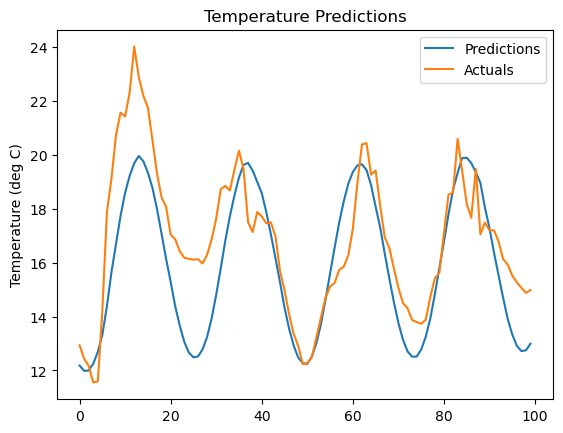

In [39]:
# evaluate and plot temperature
plot_temp_predictions(model_lstm, X_test, Y_test)

159/159 [==============================] - 0s 1ms/step


,Pressure Predictions,Pressure Actuals
0,982.200500,982.43
1,982.395569,982.68
2,982.618896,983.02
3,982.882507,983.59
4,983.264587,983.59
...,...,...
95,985.588501,985.54
96,985.697510,985.68
97,985.834839,985.68
98,985.883606,985.67


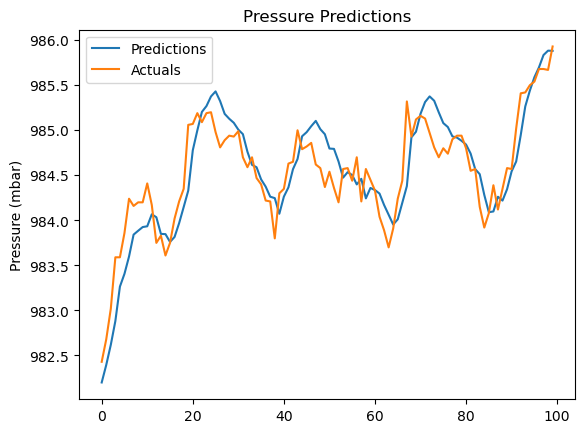

In [40]:
# evaluate and plot pressure
plot_pre_predictions(model_lstm, X_test, Y_test)

### CNN Model Evaluation

159/159 [==============================] - 0s 629us/step


,Temperature Predictions,Temperature Actuals
0,13.039551,12.93
1,12.827209,12.43
2,12.735168,12.17
3,12.776611,11.55
4,12.890503,11.59
...,...,...
95,13.893311,15.52
96,14.034119,15.27
97,14.186035,15.07
98,14.494873,14.88


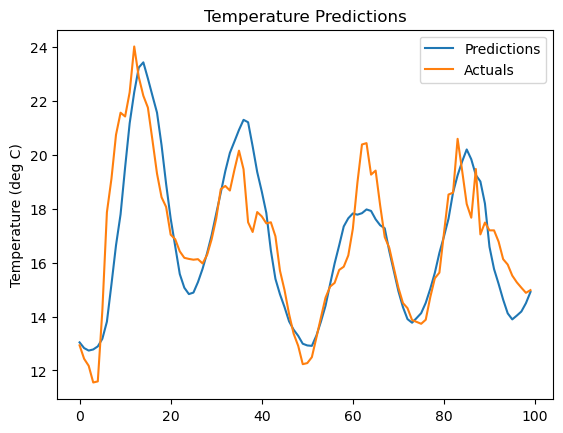

In [46]:
# evaluate and plot temperature
plot_temp_predictions(model_CNN, X_test, Y_test)

159/159 [==============================] - 0s 563us/step


,Pressure Predictions,Pressure Actuals
0,982.404907,982.43
1,982.581665,982.68
2,982.721558,983.02
3,982.876587,983.59
4,983.251099,983.59
...,...,...
95,985.508118,985.54
96,985.549805,985.68
97,985.560547,985.68
98,985.549255,985.67


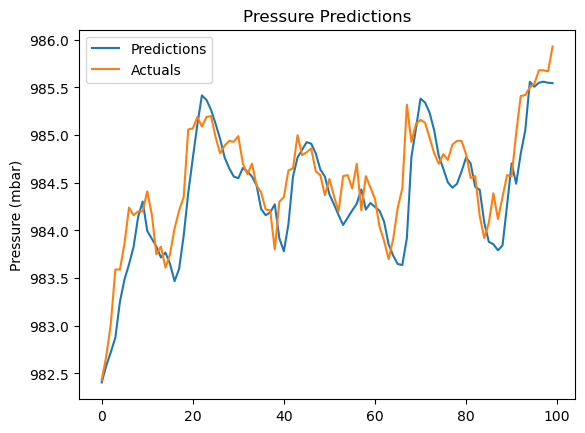

In [47]:
# evaluate and plot pressure
plot_pre_predictions(model_CNN, X_test, Y_test)

### GRU Model Evaluation

159/159 [==============================] - 0s 1ms/step


,Temperature Predictions,Temperature Actuals
0,13.350281,12.93
1,13.181396,12.43
2,13.081238,12.17
3,13.174744,11.55
4,13.302612,11.59
...,...,...
95,14.601807,15.52
96,14.267578,15.27
97,14.050415,15.07
98,14.108154,14.88


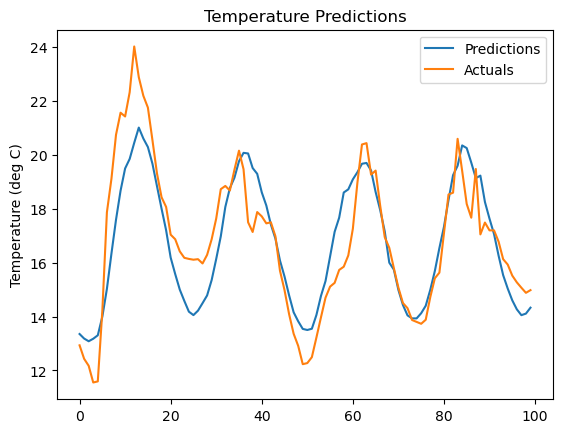

In [51]:
# evaluate and plot temperature
plot_temp_predictions(model_GRU, X_test, Y_test)

159/159 [==============================] - 0s 964us/step


,Pressure Predictions,Pressure Actuals
0,981.422974,982.43
1,981.669495,982.68
2,981.916504,983.02
3,982.176453,983.59
4,982.558289,983.59
...,...,...
95,985.014343,985.54
96,985.140320,985.68
97,985.279358,985.68
98,985.343689,985.67


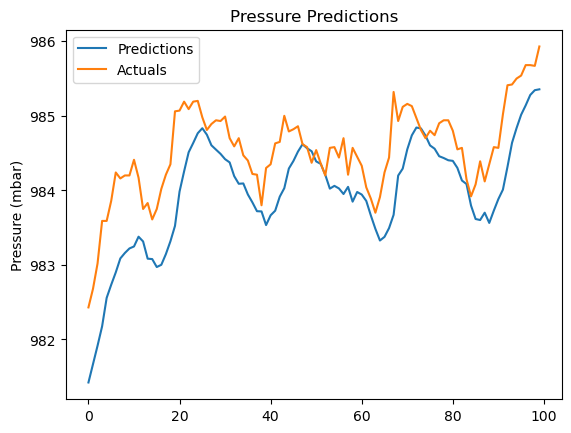

In [52]:
# evaluate and plot pressure
plot_pre_predictions(model_GRU, X_test, Y_test)